## Exploring the Data

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# loading in the data
fem_temp = pd.read_csv('./Data/Mouse_Data_Student_Copy.xlsx - Fem Temp.csv')
fem_act = pd.read_csv('./Data/Mouse_Data_Student_Copy.xlsx - Fem Act.csv')
male_temp = pd.read_csv('./Data/Mouse_Data_Student_Copy.xlsx - Male Temp.csv')
male_act = pd.read_csv('./Data/Mouse_Data_Student_Copy.xlsx - Male Act.csv')

In [3]:
#adding a time column, so that we can do like time of day analysis
#but this is also assuming that everything started at midnight on jan 1st
#and thats not exactly true, but it should be good for a some simple graphs
minutes_per_day=1440 # according to google
days=14 # bc its over 2 weeks
total_minutes =minutes_per_day *days 
time_index =pd.date_range(start="2024-01-01", periods=total_minutes, freq="T")

for df in [fem_act,fem_temp,male_act,male_temp]:
    df['Time'] =time_index # makin a a time column

# fem_act.head()

In [56]:
# melting the data to make plotting a bit easier
fem_temp_melt=fem_temp.melt(id_vars="Time", var_name="Mouse", value_name="Temperature")
male_temp_melt=male_temp.melt(id_vars="Time", var_name="Mouse", value_name="Temperature")
fem_act_melt =fem_act.melt(id_vars="Time", var_name="Mouse", value_name="Activity")
male_act_melt =male_act.melt(id_vars="Time", var_name="Mouse", value_name="Activity")

1. line plot of the mean temp over time (male v female)

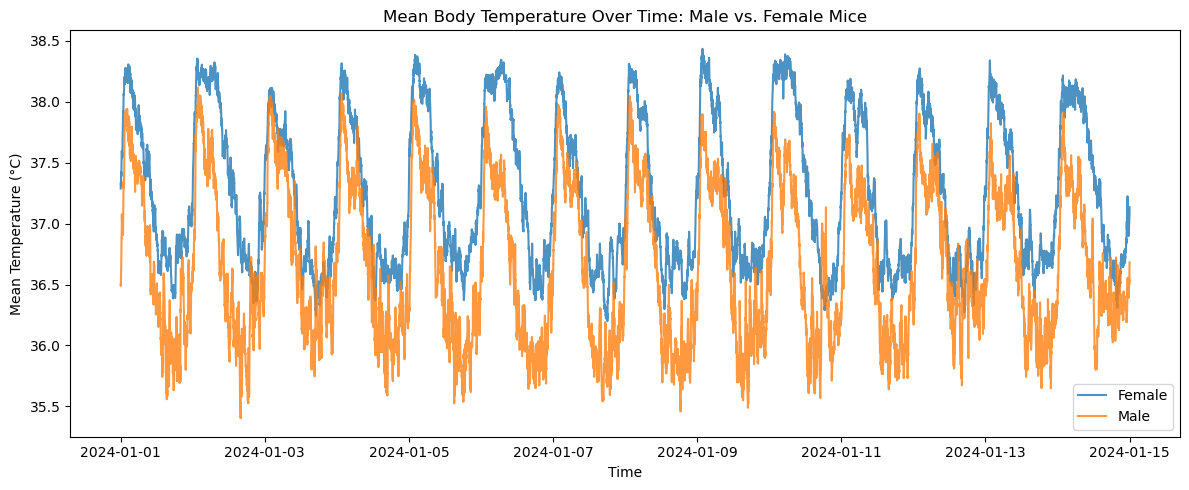

In [57]:
fem_temp_avg = fem_temp_melt.groupby("Time")["Temperature"].mean().reset_index()
fem_temp_avg["Sex"]="Female"

male_temp_avg = male_temp_melt.groupby("Time")["Temperature"].mean().reset_index()
male_temp_avg["Sex"] ="Male"

temp_avg_combined=pd.concat([fem_temp_avg, male_temp_avg])

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(fem_temp_avg["Time"], fem_temp_avg["Temperature"], label="Female", alpha=0.8)
ax.plot(male_temp_avg["Time"], male_temp_avg["Temperature"], label="Male", alpha=0.8)
ax.set_title("Mean Body Temperature Over Time: Male vs. Female Mice")
ax.set_xlabel("Time")
ax.set_ylabel("Mean Temperature (°C)")
ax.legend()

plt.tight_layout()
plt.show()

2. box plot male v female activity levels day v night cycles

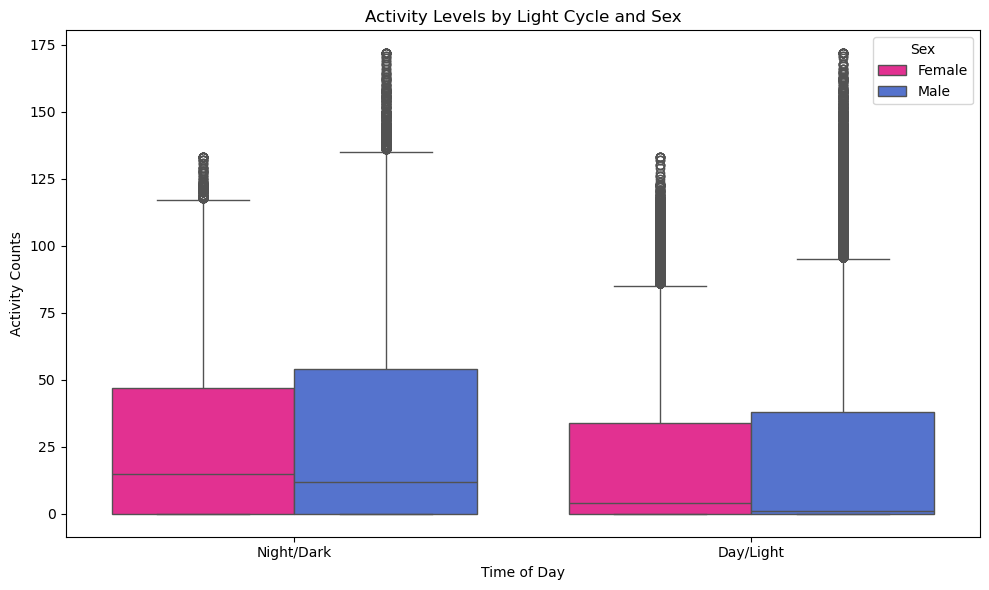

In [58]:
# making light and dark labels
for df in [fem_act_melt, male_act_melt]:
    df['Hour'] = df['Time'].dt.hour
    df['Light'] = np.where(df['Hour'].between(6, 17), 'Day/Light', 'Night/Dark')

fem_act_melt['Sex']='Female'
male_act_melt['Sex']='Male'

activity_combined = pd.concat([fem_act_melt, male_act_melt])

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=activity_combined, x='Light', y='Activity', hue='Sex',
            palette={'Female': 'deeppink', 'Male': 'royalblue'},ax=ax)
ax.set_title("Activity Levels by Light Cycle and Sex")
ax.set_ylabel("Activity Counts")
ax.set_xlabel("Time of Day")

plt.tight_layout()
plt.show()

3. heatmap of a random female mouse across the 14 days

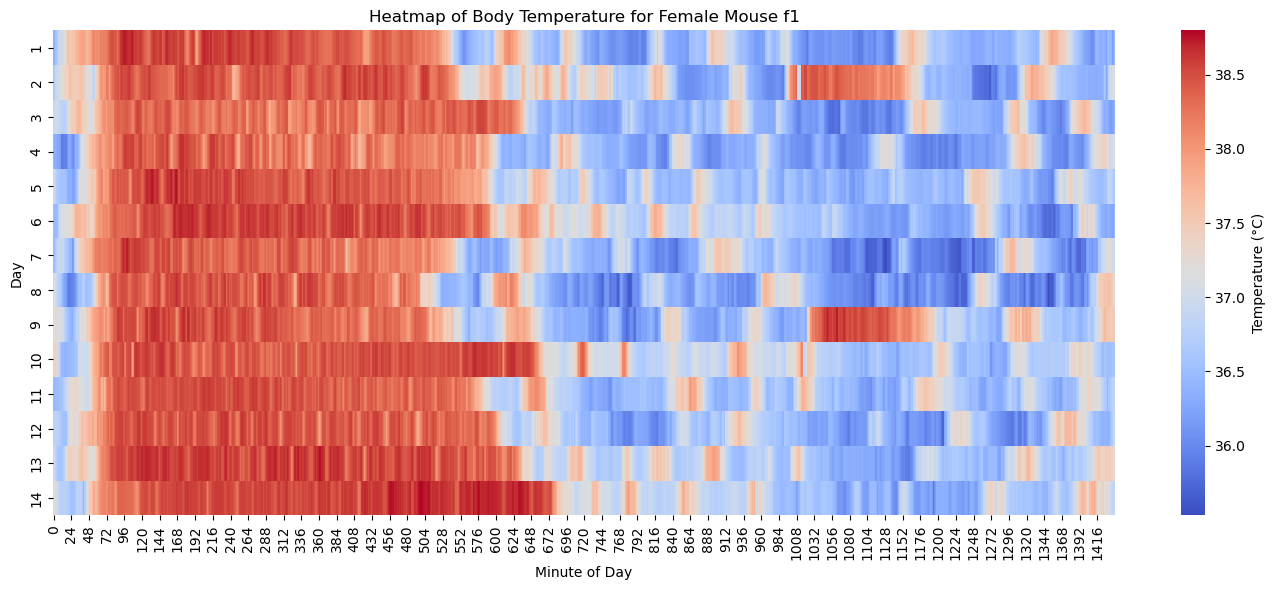

In [59]:
mouse_id='f8'
f1_temp =fem_temp[['Time', mouse_id]].copy()
f1_temp['Day'] =f1_temp['Time'].dt.day
f1_temp['Minute of Day'] = f1_temp['Time'].dt.hour*60 +f1_temp['Time'].dt.minute

f1_temp_matrix =f1_temp.pivot(index='Day', columns='Minute of Day', values=mouse_id)

plt.figure(figsize=(14, 6))
sns.heatmap(f1_temp_matrix, cmap="coolwarm", cbar_kws={'label': 'Temperature (°C)'})
plt.title("Heatmap of Body Temperature for Female Mouse f1")
plt.xlabel("Minute of Day")
plt.ylabel("Day")

plt.tight_layout()
plt.show()


4. scatterplot of activity v temp for females

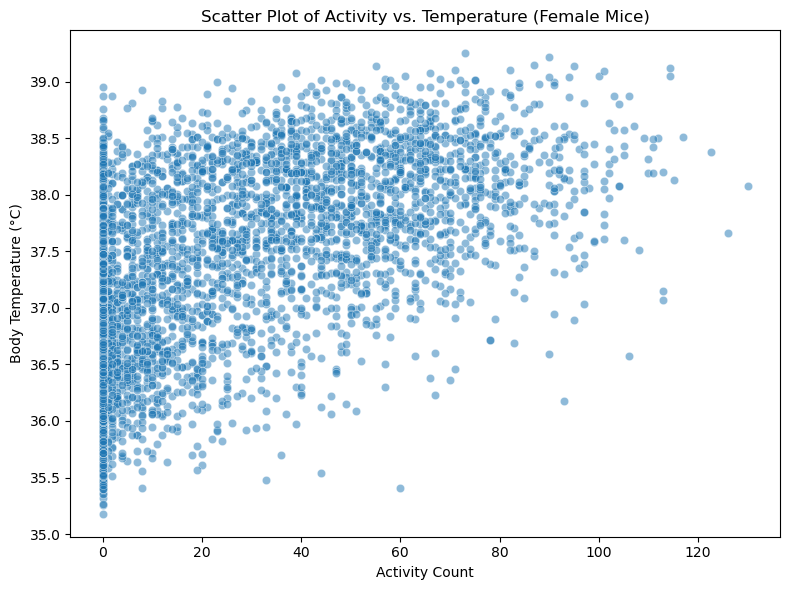

In [60]:
fem_merged=pd.merge(fem_act_melt, fem_temp_melt, on=["Time", "Mouse"])
#there were way too many data points on the plot so i took a sample so we can see them better
sampled_fem = fem_merged.sample(5000, random_state=42) 


plt.figure(figsize=(8, 6))
sns.scatterplot(data=sampled_fem, x="Activity", y="Temperature", alpha=0.5)
plt.title("Scatter Plot of Activity vs. Temperature (Female Mice)")
plt.xlabel("Activity Count")
plt.ylabel("Body Temperature (°C)")

plt.tight_layout()
plt.show()


5. line plot of one female and one male mouse's temp

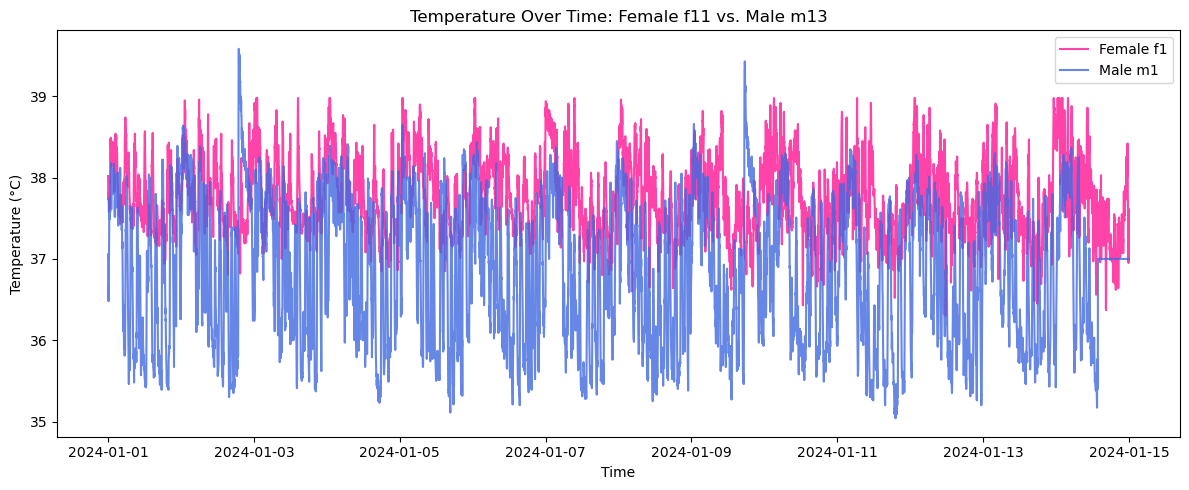

In [61]:
# i just picked 2 random mice to compare
fem_11=fem_temp[["Time", "f11"]].rename(columns={"f11": "Temperature"})
fem_11["Mouse"]="Female F11"

male_13 = male_temp[["Time", "m13"]].rename(columns={"m13": "Temperature"})
male_13["Mouse"]="Male M13"

example_combined = pd.concat([fem_11, male_13])
fem_11 = fem_11.drop_duplicates(subset=["Time"])
male_13 = male_13.drop_duplicates(subset=["Time"])

paired_temp = pd.merge(fem_11, male_13, on="Time", suffixes=("_Female_f11", "_Male_m13"))

plt.figure(figsize=(12, 5))
plt.plot(paired_temp["Time"], paired_temp["Temperature_Female_f11"], label="Female f1", color="deeppink", alpha=0.8)
plt.plot(paired_temp["Time"], paired_temp["Temperature_Male_m13"], label="Male m1", color="royalblue",alpha=0.8)
plt.title("Temperature Over Time: Female f11 vs. Male m13")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()

plt.tight_layout()
plt.show()


In [62]:
fem_temp_melt

Time Mouse  Temperature
0      2024-01-01 00:00:00    f1        37.11
1      2024-01-01 00:01:00    f1        37.13
2      2024-01-01 00:02:00    f1        37.19
3      2024-01-01 00:03:00    f1        37.20
4      2024-01-01 00:04:00    f1        37.22
...                    ...   ...          ...
262075 2024-01-14 23:55:00   f13        36.37
262076 2024-01-14 23:56:00   f13        36.48
262077 2024-01-14 23:57:00   f13        36.56
262078 2024-01-14 23:58:00   f13        36.65
262079 2024-01-14 23:59:00   f13        36.67

[262080 rows x 3 columns]

In [63]:
milan_fem_temp = fem_temp_melt.copy()
milan_fem_temp['minute'] = milan_fem_temp['Time'].dt.strftime('%H:%M')
milan_fem = milan_fem_temp.groupby('minute')['Temperature'].mean()

In [64]:
milan_male_temp = male_temp_melt.copy()
milan_male_temp['minute'] = milan_male_temp['Time'].dt.strftime('%H:%M')
milan_male = milan_male_temp.groupby('minute')['Temperature'].mean()


In [65]:
# Combine the two Series into a single DataFrame
milan_merged = pd.concat(
    [milan_fem.rename('Female'), milan_male.rename('Male')],
    axis=1
)

# Optional: sort by time if needed
milan_merged = milan_merged.sort_index()


In [66]:
milan_merged.to_json("temperature_data")

In [67]:
milan_activity = activity_combined.copy()
milan_activity['minute'] = milan_activity['Time'].dt.strftime("%H:%M")
milan_activity.groupby(['Sex', 'minute'])[['Activity']].mean()

Activity
Sex    minute           
Female 00:00   22.599541
       00:01   22.648352
       00:02   22.527473
       00:03   23.013275
       00:04   23.840659
...                  ...
Male   23:55   18.571429
       23:56   18.016484
       23:57   19.247253
       23:58   19.283787
       23:59   19.120879

[2880 rows x 1 columns]

In [68]:
milan_activity = activity_combined.copy()
milan_activity['minute'] = milan_activity['Time'].dt.strftime("%H:%M")

# Group and reshape
activity_by_minute = (
    milan_activity
    .groupby(['minute', 'Sex'])['Activity']
    .mean()
    .unstack()  # makes 'Sex' values (e.g., Male, Female) into columns
)

# Optional: rename columns if needed
activity_by_minute.columns.name = None  # remove 'Sex' label


In [69]:
activity_by_minute.to_json('activity_data')

In [70]:
# Calculate the activity derivatives for both Female and Male
activity_derivative_female = activity_by_minute['Female'].diff()
activity_derivative_male = activity_by_minute['Male'].diff()

# Handle the first row (00:00) by manually setting the difference between 23:59 and 00:00
activity_derivative_female.iloc[0] = activity_by_minute['Female'].iloc[0] - activity_by_minute['Female'].iloc[-1]
activity_derivative_male.iloc[0] = activity_by_minute['Male'].iloc[0] - activity_by_minute['Male'].iloc[-1]

# Add the derivatives back to the DataFrame
activity_by_minute['Female_Activity_Derivative'] = activity_derivative_female
activity_by_minute['Male_Activity_Derivative'] = activity_derivative_male
activity_data = activity_by_minute[['Female_Activity_Derivative', 'Male_Activity_Derivative']].rename(columns={
    'Female_Activity_Derivative': 'female_act_chng', 
    'Male_Activity_Derivative': 'male_act_chng'
    })


In [71]:
activity_data.to_json('activity_chng_data')

In [72]:
milan_merged = milan_merged.rename(columns={'Female':'female_temp', 'Male': 'male_temp'})

In [73]:
activity_data

female_act_chng  male_act_chng
minute                                
00:00          1.703937       0.456044
00:01          0.048810       2.840659
00:02         -0.120879      -0.032967
00:03          0.485803      -1.049451
00:04          0.827384       0.725275
...                 ...            ...
23:55          0.516484       1.593407
23:56          2.653846      -0.554945
23:57         -0.368132       1.230769
23:58          0.120879       0.036534
23:59         -0.884615      -0.162907

[1440 rows x 2 columns]

In [74]:
temp_act_data = milan_merged.merge(activity_data, left_index=True, right_index=True)

In [75]:
temp_act_data.to_json('temp_act_data')

In [76]:
temp_act_data

female_temp  male_temp  female_act_chng  male_act_chng
minute                                                        
00:00     37.260934  36.535714         1.703937       0.456044
00:01     37.275659  36.547198         0.048810       2.840659
00:02     37.287143  36.557308        -0.120879      -0.032967
00:03     37.302143  36.564066         0.485803      -1.049451
00:04     37.321593  36.567363         0.827384       0.725275
...             ...        ...              ...            ...
23:55     37.194670  36.525824         0.516484       1.593407
23:56     37.201868  36.518352         2.653846      -0.554945
23:57     37.216209  36.516648        -0.368132       1.230769
23:58     37.231813  36.522692         0.120879       0.036534
23:59     37.238297  36.531538        -0.884615      -0.162907

[1440 rows x 4 columns]

In [92]:
fem_temp['minute'] = fem_temp['Time'].dt.strftime("%H:%M")
fem_std = fem_temp.drop(columns='Time').groupby('minute').mean().T.std()

In [96]:
male_temp['minute'] = male_temp['Time'].dt.strftime("%H:%M")
male_std = male_temp.drop(columns='Time').groupby('minute').mean().T.std()

In [99]:
temp_act_data['male__std'] = male_std
temp_act_data['female_std'] = fem_std

In [103]:
temp_act_data.to_json('data_real')

In [104]:
temp_act_data

female_temp  male_temp  female_act_chng  male_act_chng  male__std  \
minute                                                                      
00:00     37.260934  36.535714         1.703937       0.456044   0.289951   
00:01     37.275659  36.547198         0.048810       2.840659   0.289450   
00:02     37.287143  36.557308        -0.120879      -0.032967   0.300473   
00:03     37.302143  36.564066         0.485803      -1.049451   0.303719   
00:04     37.321593  36.567363         0.827384       0.725275   0.311178   
...             ...        ...              ...            ...        ...   
23:55     37.194670  36.525824         0.516484       1.593407   0.315514   
23:56     37.201868  36.518352         2.653846      -0.554945   0.296432   
23:57     37.216209  36.516648        -0.368132       1.230769   0.296446   
23:58     37.231813  36.522692         0.120879       0.036534   0.300623   
23:59     37.238297  36.531538        -0.884615      -0.162907   0.306360   

        female_std  
minute              
00:00     0.457287  
00:01     0.449869  
00:02     0.441608  
00:03     0.436746  
00:04     0.431825  
...            ...  
23:55     0.437581  
23:56     0.436877  
23:57     0.435906  
23:58     0.438327  
23:59     0.436587  

[1440 rows x 6 columns]

In [172]:
import matplotlib.pyplot as plt

# Process both datasets
male_stats = male_temp.drop(columns='Time').groupby("minute").mean().T.agg(['max', 'min', 'mean']).T



filtered_male_stats = male_stats.loc["12:14":"13:41"]

smoothed = filtered_male_stats.rolling(window=3, center=True).mean().dropna()

a = male_temp.drop(columns='Time').groupby('minute').mean().loc["12:15":"13:40"]

smoothed.merge(a, left_index=True, right_index=True).to_json('additional_data')


In [170]:
male_temp.drop(columns='Time').groupby('minute').mean().loc["12:15":"13:40"]

m1         m2         m3         m4         m5         m6  \
minute                                                                     
12:15   36.157857  36.768571  36.077857  35.997857  36.370714  36.359286   
12:16   36.151429  36.762143  36.185000  36.000714  36.408571  36.337143   
12:17   36.148571  36.752143  36.169286  36.000714  36.438571  36.323571   
12:18   36.126429  36.765000  36.156429  35.992143  36.500000  36.309286   
12:19   36.098571  36.773571  35.995714  35.980714  36.637143  36.297143   
...           ...        ...        ...        ...        ...        ...   
13:36   35.830714  36.441429  36.110714  35.720714  35.932143  35.600000   
13:37   35.830714  36.412143  36.115000  35.745000  36.020714  35.597857   
13:38   35.820714  36.387143  36.107857  35.765714  36.259286  35.588571   
13:39   35.817857  36.377857  36.095000  35.765714  36.321429  35.590714   
13:40   35.819286  36.389286  36.060000  35.761429  36.164981  35.594286   

               m7         m8         m9        m10        m11        m12  \
minute                                                                     
12:15   36.380714  36.552857  35.591429  36.252143  36.090195  35.913571   
12:16   36.385714  36.590000  35.585714  36.230000  36.121624  35.897857   
12:17   36.380000  36.600000  35.585714  36.197857  36.120910  35.880000   
12:18   36.374286  36.582143  35.595714  36.180714  36.402356  35.847857   
12:19   36.397857  36.567143  35.580000  36.145714  36.095910  35.840000   
...           ...        ...        ...        ...        ...        ...   
13:36   36.294286  35.829286  35.734286  35.581429  36.094286  35.696429   
13:37   36.260000  35.834286  35.746429  35.596429  36.114286  35.694286   
13:38   36.221429  35.827143  35.909286  35.608571  36.154286  35.570000   
13:39   36.217857  35.824286  35.925714  35.610714  36.180000  35.577857   
13:40   36.055714  35.823571  35.802857  35.622143  36.177143  35.582857   

              m13  
minute             
12:15   35.919286  
12:16   35.906429  
12:17   35.895000  
12:18   35.869286  
12:19   35.847143  
...           ...  
13:36   36.587857  
13:37   36.590000  
13:38   36.581429  
13:39   36.560714  
13:40   36.550000  

[86 rows x 13 columns]

<Axes: xlabel='minute'>

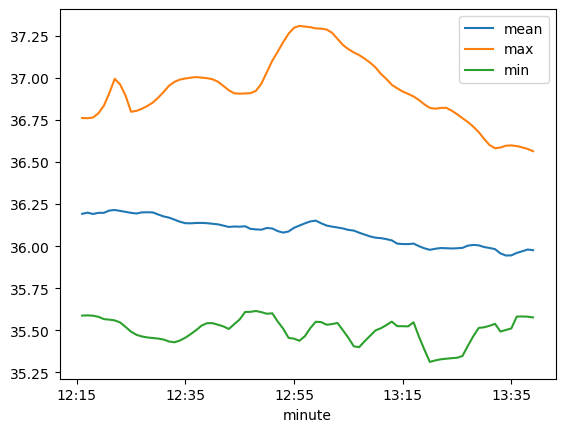

In [153]:
# Process both datasets
male_stats = male_temp.drop(columns='Time').groupby("minute").mean().T.agg(['mean', 'max','min']).T


filtered_male_stats = male_stats.loc["12:15":"13:40"]

smoothed = filtered_male_stats.rolling(window=3, center=True).mean()
smoothed.plot()